<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP_2022/blob/main/03%20Machine%20Learning/notebooks/soluciones/13-Clustering-SOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Clustering</h1>


* El análisis de agrupamiento, o agrupamiento, es una tarea de aprendizaje automático no supervisada.

* Implica descubrir automáticamente la agrupación natural de los datos. A diferencia del aprendizaje supervisado (como el modelado predictivo), los algoritmos de agrupación solo interpretan los datos de entrada y encuentran grupos o agrupaciones naturales en el espacio de características.

* Un grupo, o cluster, es un en el espacio de características donde las instancias están más cerca del grupo que de otros grupos.

* Es probable que estos grupos reflejen algún mecanismo en funcionamiento en el dominio del que se extraen las instancias, un mecanismo que hace que algunas instancias tengan un parecido más fuerte entre sí que con las instancias restantes.

* La agrupación en clústers puede ser útil como actividad de análisis de datos para obtener más información sobre el dominio del problema, el llamado descubrimiento de patrones o descubrimiento de conocimiento.

* El agrupamiento también puede ser útil como un tipo de ingeniería de características, donde los ejemplos existentes y nuevos se pueden mapear y etiquetar como pertenecientes a uno de los grupos identificados en los datos.

* La evaluación de los grupos identificados es subjetiva y puede requerir un experto en el dominio, aunque existen muchas medidas cuantitativas específicas de los grupos.

&#128214; <u>Referencias bibliográficas</u>:
* Flach, Peter (2012). Machine Learning: The Art and Science of Algorithms that Make Sense of Data. Cambridge University Press.

[Algoritmos de clustering en scikit-learn](https://scikit-learn.org/stable/modules/clustering.html)

___

Recuerda la simbología de las secciones:

* 🔽 Esta sección no forma parte del proceso usual de Machine Learning. Es una exploración didáctica de algún aspecto del funcionamiento del algoritmo.
* ⚡ Esta sección incluye técnicas más avanzadas destinadas a optimizar o profundizar en el uso de los algoritmos.
* ⭕ Esta sección contiene un ejercicio o práctica a realizar. Aún si no se establece una fecha de entrega, es muy recomendable realizarla para practicar conceptos clave de cada tema.

# Demostración ilustrativa de algunos algoritmos de agrupamiento

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

## Datasets artificiales

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

plt.figure(figsize=(12, 10))

# Dataset 1: Clusters esféricos
X1, y1 = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)
plt.subplot(2, 2, 1)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap='viridis', s=10)
plt.title("Clusters esféricos", fontsize=12)
plt.axis('off')

# Dataset 2: Medialunas
X2, y2 = make_moons(n_samples=300, noise=0.05, random_state=42)
plt.subplot(2, 2, 2)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap='viridis', s=10)
plt.title("Clusters no convexos", fontsize=12)
plt.axis('off')

# Dataset 3: Densidad variable + ruido
X3_1, _ = make_blobs(n_samples=100, centers=1, cluster_std=0.3, random_state=42)
X3_2, _ = make_blobs(n_samples=200, centers=1, cluster_std=1.5, random_state=42)
noise = np.random.uniform(low=-6, high=6, size=(20, 2))
X3 = np.vstack([X3_1, X3_2, noise])
y3 = np.concatenate([np.zeros(100), np.ones(200), np.full(20, -1)])  # -1 = ruido
plt.subplot(2, 2, 3)
plt.scatter(X3[:, 0], X3[:, 1], c=y3, cmap='viridis', s=10)
plt.title("Densidad variable + ruido", fontsize=12)
plt.axis('off')

# Dataset 4: Clusters anisotrópicos
X4, y4 = make_blobs(n_samples=300, random_state=42)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X4 = np.dot(X4, transformation)
plt.subplot(2, 2, 4)
plt.scatter(X4[:, 0], X4[:, 1], c=y4, cmap='viridis', s=10)
plt.title("Clusters anisotrópicos", fontsize=12)
plt.axis('off')

plt.tight_layout()
plt.show()

Generación de datos sintéticos

A diferencia del aprendizaje supervisado, en los métodos de clustering (implementados en scikit-learn) el proceso es de la siguiente manera:

1. Inicializar el objeto, por ejemplo `modelo = KMeans(n_clusters=3)`.
2. Hacer fit: `modelo.fit(X)`. Hay dos opciones:
    * Obtener la lista de etiquetas de clusters como `y_clusters = modelo.predict(X)`.
    * Obtener la lista de etiquetas de clusters usando el atributo `labels_` como `y_clusters = modelo.labels_`.

También pueden obtenerse las etiquetas de los clusters directamente con el método `fit_transform()`.

En esta notebook estaremos usando indistintamente los 3 métodos para ejemplificar su uso.

## [K-MEANS](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Definamos el dataset sintético a usar

In [ ]:
X = X4.copy()
y = y4.copy()

Probemos varios valores de `n_clusters`





In [ ]:
from sklearn.cluster import KMeans

# Definir el número de clusters a buscar:
num_clusters = 3

modelo = KMeans(n_clusters=num_clusters)
modelo.fit(X)
y_clusters = modelo.predict(X)

plt.figure()
plt.scatter(X[:,0], X[:,1], c=y_clusters)
plt.show()

Evaluemos la tarea de clustering usando la métrica de [score de silueta](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html):

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, y_clusters))

Evaluemos la tarea de clustering usando la métrica de [adjusted mutual information (AMI)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html).

❗ Recuerda que, para esta métrica, necesitamos dos clusterings que comparar. Idealmente, uno es el *ground-truth clustering*. Para esto usemos las etiquetas `y`.

In [ ]:
from sklearn.metrics import adjusted_mutual_info_score

print(adjusted_mutual_info_score(y, y_clusters))

Estamos comparando estos clusterings:

In [ ]:
#@title Estamos comparando estos dos clusterings

fig, axs = plt.subplots(1,2,figsize=(10,5))
axs[0].scatter(X[:, 0], X[:, 1],c=y)
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_title("Ground truth")
axs[1].scatter(X[:, 0], X[:, 1],c=y_clusters)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_title("K-means")
fig.tight_layout()
fig.show()

🔽 Veamos los centroides de cada cluster

In [ ]:
centers = modelo.cluster_centers_

plt.scatter(X[:, 0], X[:, 1],c=y_clusters)
plt.scatter(centers[:,0],centers[:,1],color='black', marker='x',s=80)

plt.show()

### ⚡ ¿Cómo sabemos cuántos clusters buscar?

Cuando los métodos de clustering requieren, como hiperparámetro, el número de clusters a encontrar, podemos realizar cualquiera de los siguientes análisis.

#### Elbow value

❗ Sólo es para K-Means

In [ ]:
modelo.inertia_

In [ ]:
max_num_clusters = 20

inertias = []
k_values = list(range(1,max_num_clusters))
for k in k_values:
    modelo = KMeans(n_clusters=k, n_init='auto')
    modelo.fit(X)
    inertias.append(modelo.inertia_)

plt.figure(figsize=(7,5))
plt.plot(k_values,inertias,color='red')
plt.axvline(x=4,linestyle='dashed',color='gray')
plt.ylabel("Inertia", fontsize=15)
plt.xlabel("Value of k", fontsize=15)
plt.xticks(k_values)
plt.show()

#### Análisis de silueta

**Funciona para cualquier método**

También podemos usar el **score de silueta**, el cual es un valor $-1\leq s\leq 1$ que mide que tan coherente son los puntos dentro de sus propios clusters, en términos de las distancias a los demás clusters. Entre más alto el valor, la configuración del clúster es apropiada. **Este score es intrínseco del clustering**.

Usaremos la implementación de [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).

In [ ]:
from sklearn.metrics import silhouette_score

max_num_clusters = 20

best_num_clusters = 4

siluetas = []
k_values = list(range(2,max_num_clusters))
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto').fit(X)
    labels = kmeans.labels_
    siluetas.append(silhouette_score(X, labels, metric='euclidean'))

plt.figure(figsize=(7,5))
plt.plot(k_values,siluetas,color='red')
# plt.axvline(x=best_num_clusters,linestyle='dashed',color='gray')
plt.xticks(k_values)
plt.ylabel("Silhoutte Scores", fontsize=15)
plt.xlabel("Value of k", fontsize=15)
plt.show()

#### Anáisis de Adjusted Mutual Information (AMI)

Buscamos el clustering con el mayor valor de AMI.

Es un score que asigna una puntuación a la comparación entre dos clusterings. La Información Mutua Ajustada mide que tanta información comparten dos clusterings en términos de los elementos que comparten, es decir, del tamaño de la intersección.





In [ ]:
from sklearn.metrics import adjusted_mutual_info_score

max_num_clusters = 20

best_num_clusters = 4

scores = []
k_values = list(range(2,max_num_clusters))
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(X)
    labels = kmeans.labels_
    scores.append(adjusted_mutual_info_score(y, labels))

plt.figure(figsize=(7,5))
plt.plot(k_values,scores,color='red')
plt.axvline(x=best_num_clusters,linestyle='dashed',color='gray')
plt.xticks(k_values)
plt.ylabel("Adjusted Mutual Information", fontsize=15)
plt.xlabel("Value of k", fontsize=15)
plt.show()

Como podemos ver, en los tres casos se valida la hipótesis de que el mejor valor para $K$ es $K=3$. Esta hipótesis tiene mayor peso por el conocimiento previo del problema, es decir, al generar los datos sabiamos que teniamos 3 grupos de puntos.

### 🔽 K-Means es sensible a outliers

In [ ]:
#@title Efecto de outliers en K-Means

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment

# Generamos datos normales (3 clusters compactos)
np.random.seed(42)
X_inicial = np.vstack([
    np.random.normal(loc=[5, 0], scale=0.5, size=(100, 2)),  # Cluster 1
    np.random.normal(loc=[7, 4], scale=0.5, size=(100, 2)),  # Cluster 2
    np.random.normal(loc=[8, 0], scale=0.5, size=(95, 2))  # Cluster 3
])

# Añadimos outliers
outliers = np.array([ [25, -10], [20,-15],[22,-12],[23,-14],[24,-16],[24.5,-15.5]])
X_with_outliers = np.vstack([X_inicial, outliers])

# Aplicamos K-means a ambos conjuntos
kmeans_normal = KMeans(n_clusters=3, random_state=42).fit(X_inicial)
kmeans_outliers = KMeans(n_clusters=3, random_state=42).fit(X_with_outliers)

# --- Paso clave: Reordenar etiquetas para que coincidan los colores ---
distance_matrix = cdist(kmeans_normal.cluster_centers_, kmeans_outliers.cluster_centers_)
row_ind, col_ind = linear_sum_assignment(distance_matrix)

# Mapeamos las etiquetas del modelo con outliers para que coincidan con las originales
labels_outliers_reordered = np.zeros_like(kmeans_outliers.labels_)
for original_label, outlier_label in zip(row_ind, col_ind):
    labels_outliers_reordered[kmeans_outliers.labels_ == outlier_label] = original_label

# Graficamos
plt.figure(figsize=(12, 5))

# Sin outliers
plt.subplot(1, 2, 1)
plt.scatter(X_inicial[:, 0], X_inicial[:, 1], c=kmeans_normal.labels_,
            cmap='viridis',
            alpha=0.6)
plt.scatter(
    kmeans_normal.cluster_centers_[:, 0],
    kmeans_normal.cluster_centers_[:, 1],
    c='red', marker='X', s=50, label='Centroides'
)
plt.title("K-means SIN outliers")
plt.xlim(-2, 30)
plt.ylim(-20, 10)
plt.legend()

# Con outliers
plt.subplot(1, 2, 2)
plt.scatter(X_with_outliers[:, 0], X_with_outliers[:, 1],
            c=labels_outliers_reordered,
            cmap='viridis',
            alpha=0.6)
plt.scatter(
    kmeans_outliers.cluster_centers_[:, 0],
    kmeans_outliers.cluster_centers_[:, 1],
    c='red', marker='X', s=50, label='Centroides'
)
plt.title("K-means CON outliers")
plt.xlim(-2, 30)
plt.ylim(-20, 10)
plt.legend()

plt.tight_layout()
plt.show()

## [Clustering Jerárquico](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

* La agrupación jerárquica es una familia general de algoritmos de agrupación que crean agrupaciones anidadas fusionándolas o dividiéndolas sucesivamente. Esta jerarquía de grupos se representa como un árbol (o dendrograma). La raíz del árbol es el grupo único que reúne todas las muestras, siendo las hojas los grupos con una sola muestra.
* La implementación [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) de scikit-learn realiza una agrupación jerárquica utilizando un enfoque ascendente (bottom-up): cada observación comienza en su propio grupo, y los grupos se fusionan sucesivamente. Los criterios de vinculación (_linkage_) determinan la métrica utilizada para la estrategia de fusión:
  - _Ward_ minimiza la suma de las diferencias al cuadrado dentro de todos los grupos. Es un enfoque que minimiza la varianza y, en este sentido, es similar a la función objetivo de k-means pero se aborda con un enfoque jerárquico aglomerativo.
  - _Maximum_ o _complete Linkage_ minimiza la distancia máxima entre observaciones de pares de grupos.
  - _Average linkage_ minimiza el promedio de las distancias entre todas las observaciones de pares de grupos.
  - _Single linkage_ minimiza la distancia entre las observaciones más cercanas de pares de grupos.



---


Se puede especificar, ya sea el número de clusters o el umbral de distancia máxima:

* Si `n_clusters`$\geq2$ entonces nos regresa ese número de clusters.
* Si `n_clusters`=None, hay que especificar un `distance_threshold`.
* Si `distance_threshold`$\neq$None, `n_clusters` debe ser None y `compute_full_tree` debe ser True.


Escoger el dataset

In [ ]:
X = X4.copy()
y = y4.copy()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

modelo = AgglomerativeClustering(distance_threshold=None,
                                 n_clusters=3,
                                 compute_full_tree=True)

yhat = modelo.fit_predict(X)
num_clusters_encontrados = np.unique(yhat).shape[0]

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=yhat)
plt.title(f"{num_clusters_encontrados} clusters encontrados.")
plt.show()

También podemos usar criterios externos para escoger un número de clusters adecuado. Por ejemplo, podemos usar el score de silueta. La conclusión es usar `__` clusters.

In [ ]:
from sklearn.metrics import silhouette_score

max_num_clusters = 20

num_optimo_clusters = 4

siluetas = []
k_values = list(range(2,max_num_clusters))
for k in k_values:
    ac = AgglomerativeClustering(n_clusters=k)
    ac.fit(X)
    labels = ac.labels_
    siluetas.append(silhouette_score(X, labels, metric='euclidean'))

plt.figure(figsize=(7,5))
plt.plot(k_values,siluetas,color='red')
# plt.axvline(x=num_optimo_clusters,linestyle='dashed',color='black')
plt.xticks(k_values)
plt.ylabel("Silhoutte Scores", fontsize=15)
plt.xlabel("Value of k", fontsize=15)
plt.show()

In [ ]:
#@title Graficar dendograma

from scipy.cluster.hierarchy import dendrogram
import numpy as np
import matplotlib.pyplot as plt

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Calculate the number of clusters at each distance level
    unique_distances = np.unique(linkage_matrix[:, 2])
    cluster_counts = []
    for d in unique_distances:
        cluster_counts.append(np.sum(linkage_matrix[:, 2] >= d) + 1)

    # Plot the corresponding dendrogram
    dendro = dendrogram(linkage_matrix, **kwargs)

    # Modify y-axis to show number of clusters
    ax = plt.gca()
    yticks = ax.get_yticks()
    new_labels = []
    for y in yticks:
        # Find how many clusters exist at this distance level
        n_clusters = np.sum(linkage_matrix[:, 2] >= y) + 1
        new_labels.append(f"{y:.2f}\n({n_clusters} clusters)")
    ax.set_yticklabels(new_labels)

    return dendro


plt.figure(dpi=120)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(modelo, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance (Number of clusters)")
plt.show()

## [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
* [Martin Ester, Hans-Peter Kriegel, Jörg Sander, Xiaowei Xu (1996). _A Density-Based Algorithm for Discovering Clusters in Large Spatial Databases with Noise_. Proceedings of Knowledge Discovery and Databases - The International Conference on Knowledge Discovery & Data Mining.](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf)
* DBSCAN recurre a una noción de cúmulos basada en la densidad de los mismos, que está diseñada para descubrir grupos de formas arbitrarias. DBSCAN requiere solo un parámetro de entrada $\varepsilon$, el cual determina la distancia máxima entre dos puntos para considerarse cercanos. El otro parámetro importante es el `min_samples` el cual representa el número mínimo de puntos que puede haber en un cluster.

* DBSCAN reconoce ruido. Es decir, puede dejar puntos sin asignar a ningún cluster.

* "_La razón principal por la que reconocemos los grupos, es que dentro de cada grupo tenemos una densidad típica de puntos que es considerablemente más alta que fuera del grupo. Además, la densidad dentro de las áreas de ruido es menor que la densidad en cualquiera de los grupos._"

Escoger dataset

In [ ]:
X = X1.copy()
y = y1.copy()

In [ ]:
from sklearn.cluster import DBSCAN

modelo = DBSCAN(eps=0.9,
                min_samples=9)

yhat = modelo.fit_predict(X)

clusters = [j for j in np.unique(yhat) if j!=-1]    # Todos los clusters que no son ruido

plt.figure()
plt.scatter(X[yhat==-1,0],X[yhat==-1,1],marker='x',color='gray',label='ruido')
for cluster in clusters:
    filas = np.where(yhat == cluster)
    plt.scatter(X[filas, 0], X[filas, 1])
plt.legend(loc='best')
plt.show()

¿Cómo denota DBSCAN a los puntos que no pertenecen a ningún cluster (ruido)?

In [ ]:
np.unique(yhat)

Una particularidad de DBSCAN es la susceptibilidad de los resultados en función del principal parámetro $\varepsilon$.

In [ ]:
valores_eps = np.linspace(0.0001,10,100)
num_clusters = []

for eps in valores_eps:
    modelo = DBSCAN(eps=eps, min_samples=5)
    yhat = modelo.fit_predict(X)
    clusters = np.unique(yhat)
    num_clusters.append(len(clusters))

plt.plot(valores_eps,num_clusters)
plt.suptitle("Número de clusters en función del parámetro eps")
plt.xlabel("eps",fontsize=15)
plt.ylabel("Número de clusters", fontsize=15)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

valores_eps = np.linspace(0.01,10,100)
siluetas = []

for eps in valores_eps:
    modelo = DBSCAN(eps=eps, min_samples=5)
    yhat = modelo.fit_predict(X)
    clusters = np.unique(yhat)
    if len(clusters) >= 3:
        siluetas.append(silhouette_score(X[yhat!=-1],yhat[yhat!=-1]))
    else:
        siluetas.append(0)


print(valores_eps.shape,len(siluetas))

plt.plot(valores_eps,siluetas)
plt.suptitle("Número de clusters en función del parámetro eps")
plt.xlabel("eps",fontsize=15)
plt.ylabel("Número de clusters", fontsize=15)
plt.show()

## 🔽 Comparación de K-Means, AgglomerativeClustering y DBSCAN en datasets grandes

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=15000,centers=3, random_state=174)

plt.figure()
plt.scatter(X[:,0],X[:,1],c='black')
plt.show()

In [ ]:
import time
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

modelos = [KMeans(n_clusters=3),AgglomerativeClustering(n_clusters=3),DBSCAN()]

fig, axs = plt.subplots(1,3,figsize=(15,5))

for modelo,ax in zip(modelos,axs):
    inicio = time.time()
    modelo.fit(X)
    final = time.time()
    print(f"{modelo.__class__.__name__}\n\tTiempo de ejecución: {round(final-inicio,2)} segundos")
    clusters = modelo.labels_
    ax.scatter(X[:,0],X[:,1],c=clusters)
    ax.set_title(f"{modelo.__class__.__name__}")
    ax.set_xticks([])
    ax.set_yticks([])
fig.show()

**Conclusiones**

* KMeans es bueno con datasets grandes.
* AgglomerativeClustering tarda con datasets grandes.
* DBSCAN es el más flexible.

In [ ]:
#@title Comparando todos los datasets y métodos

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN


# Configuración de clustering
def apply_clustering(X):
    # K-Means
    kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

    # Agglomerative (Ward linkage)
    agg = AgglomerativeClustering(n_clusters=2).fit(X)

    # DBSCAN (parámetros ajustables)
    dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X)

    return [kmeans.labels_, agg.labels_, dbscan.labels_]


datasets = [(X1, "Clusters esféricos"),
            (X2, "Medialunas"),
            (X3, "Densidad variable + ruido"),
            (X4, "Clusters anisotrópicos")]
methods = ["K-Means", "Agglomerative", "DBSCAN"]

plt.figure(figsize=(10, 13))

for i, (X, title) in enumerate(datasets):
    clusters = apply_clustering(X)

    for j, (labels, method) in enumerate(zip(clusters, methods)):
        plt.subplot(4, 3, i*3 + j + 1)
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)

        # Solo mostrar título en la primera fila
        if i == 0:
            plt.title(method, fontsize=12)

        # Solo mostrar etiqueta en la primera columna
        if j == 0:
            plt.ylabel(title, fontsize=12)
        plt.xticks([])
        plt.yticks([])

plt.tight_layout()
plt.show()

## Otros métodos

### Affinity Propagation

[`Affinity Propagation`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html) es un algoritmo de clustering que agrupa datos mediante el intercambio de mensajes entre puntos, representando su idoneidad para ser ejemplares (centros de clusters). A diferencia de otros métodos, determina automáticamente el número de clusters en función de dos parámetros clave:

* `preference`: Controla cuántos puntos se eligen como ejemplares (centros de clusters). Valores más altos generan más clusters.
* `damping` (factor de amortiguación, 0.5 a 1): Estabiliza las iteraciones evitando oscilaciones numéricas

*Frey, B. J., & Dueck, D. (2007). Clustering by passing messages between data points. Science, 315(5814), 972-976*. [Fuente](https://www.science.org/doi/10.1126/science.1136800)

Escogemos un dataset

In [ ]:
X = X3.copy()
y = y3.copy()

In [ ]:
from sklearn.cluster import AffinityPropagation

modelo = AffinityPropagation(damping=0.5,max_iter=500,random_state=None)

modelo.fit(X)
yhat = modelo.fit_predict(X)

clusters = np.unique(yhat)

print(f"Se encontraron {clusters.shape[0]} clusters")

for cluster in clusters:
    fila = np.where(yhat == cluster)
    plt.scatter(X[fila, 0], X[fila, 1])

plt.show()

### BIRCH

[`BIRCH`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html) es un algoritmo de clustering jerárquico bottom-up eficiente para grandes datasets, diseñado para agrupar datos métricos multidimensionales de forma incremental, optimizando el uso de memoria y tiempo. Utiliza Clustering Features (CF) —tripletas que resumen la información de los clusters— para construir iterativamente un árbol con dos parámetros clave:

* `branching_factor`: Controla el número máximo de subclusters por nodo
* `threshold`: Determina el radio máximo de los subclusters (controla la compactación)

Fue el primer método en manejar efectivamente el ruido en datasets.

*Tian Zhang, Raghu Ramakrishnan and Miron Livny (1996). _BIRCH: An Efficient Data Clustering Method for Very Large Databases_. ACM SIGMOD Record.* [DOI:10.1145/235968.233324](https://dl.acm.org/doi/10.1145/235968.233324).


In [ ]:
from sklearn.cluster import Birch

modelo = Birch(threshold=0.01, n_clusters=3)

modelo.fit(X)
yhat = modelo.predict(X)

clusters = np.unique(yhat)

for cluster in clusters:
    fila = np.where(yhat == cluster)
    plt.scatter(X[fila, 0], X[fila, 1])

plt.show()

### OPTICS

[`OPTICS`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html) es un algoritmo de clustering relacionado con DBSCAN que identifica puntos *núcleo* y expande clusters a partir de ellos. A diferencia de DBSCAN, mantiene una jerarquía de clusters para diferentes valores de radio, siendo una alternativa más eficiente para datasets grandes. Sus parámetros clave son:

* `min_samples`: Controla el número mínimo de puntos para considerar una región densa
* `max_eps`: Establece el radio máximo de búsqueda de vecindarios

*Mihael Ankerst, Markus M. Breunig, Hans-Peter Kriegel, Jörg Sander (1999). OPTICS: Ordering Points To Identify the Clustering Structure. ACM SIGMOD Record.* [DOI:10.1145/304181.304187](https://dl.acm.org/doi/10.1145/304181.304187)

In [ ]:
from sklearn.cluster import OPTICS

modelo = OPTICS(max_eps=200, min_samples=9)

yhat = modelo.fit_predict(X)

clusters = np.unique(yhat)

for cluster in clusters:
    filas = np.where(yhat == cluster)
    plt.scatter(X[filas, 0], X[filas, 1])

plt.show()

In [ ]:
num_clusters = []
valores_eps = np.linspace(0.0001,200,100)

for eps in valores_eps:
    modelo = OPTICS(eps=eps, min_samples=5)
    yhat = modelo.fit_predict(X)
    clusters = np.unique(yhat)
    num_clusters.append(len(clusters))

plt.plot(valores_eps,num_clusters)
plt.suptitle("Número de clusters en función del parámetro eps")
plt.xlabel("eps",fontsize=15)
plt.ylabel("Número de clusters", fontsize=15)
plt.show()

### Spectral Clustering

[`SpectralClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html) es un método avanzado de clustering basado en técnicas de álgebra lineal que utiliza los vectores propios de una matriz de similitud para identificar estructuras en los datos. Su principal hiperparámetro es:

* `n_clusters`: Define el número estimado de clusters a identificar

*Referencias:*
1. *Ng, A. Y., Jordan, M. I., & Weiss, Y. (2002). On Spectral Clustering: Analysis and an algorithm. NIPS.* [PDF](https://papers.nips.cc/paper/2092-on-spectral-clustering-analysis-and-an-algorithm.pdf)
2. *Von Luxburg, U. (2007). A tutorial on spectral clustering. Statistics and Computing.* [DOI:10.1007/s11222-007-9033-z](https://link.springer.com/article/10.1007/s11222-007-9033-z)

In [ ]:
from sklearn.cluster import SpectralClustering

modelo = SpectralClustering(n_clusters=2)

yhat = modelo.fit_predict(X)

clusters = np.unique(yhat)

for cluster in clusters:
    fila = np.where(yhat == cluster)
    plt.scatter(X[fila, 0], X[fila, 1])

plt.show()

## Más métricas

Hay más métricas que pueden usarse para el clustering. Las hay de dos tipos:

1. Cuando no se conoce un clustering *ground truth*, en este caso se evalua el módelo unicamente con la información de él mismo. Por ejemplo:

    * [Silhoutte score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)
    * [Calinski-Harabasz Index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html#sklearn.metrics.calinski_harabasz_score)
    * [Davies-Bouldin Index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html#sklearn.metrics.davies_bouldin_score)
    * ...

2. Cuando se conoce un clustering *ground truth* o se quieren comparar dos clusterings. Por ejemplo:
    * [AMI](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html#sklearn.metrics.adjusted_mutual_info_score)
    * [V-measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html#sklearn.metrics.v_measure_score)
    * [Rand index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.rand_score.html#sklearn.metrics.rand_score)
    * ...


## ⭕ Práctica

¿Puedes encontrar buenos clusterings para los siguientes datasets?

Considera dos datasets DS1 y DS2/DS3. En cada uno de ellos, prueba los siguientes métodos:

1. K-Means
2. AgglomerativeClustering
3. DBSCAN

Tareas a realizar:

* Realiza una busqueda de hiperparámetros basándote en alguna métrica como AMI, Silhoutte, Elbow Value (para el caso de K-Means) o alguna otra.
* Con estos hiperparámetros, escoge el mejor clustering de cada uno de los tres métodos.
* Compara visualmente los 3 clusterings obtenidos.
* Usando el score de silueta y el índice Calinski-Harabasz, ¿cuál de los tres clusterings fue mejor?
* En el caso del dataset DS1, tienes un *ground truth* clustering. Reporta el valor de la métrica [AMI](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html#sklearn.metrics.adjusted_mutual_info_score) y [ARI](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score).

In [ ]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np

n_samples = 500

DS1 = make_moons(n_samples=n_samples, noise=.05)
DS2 = np.random.rand(n_samples, 2)
DS3 = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.scatter(DS1[0][:,0],DS1[0][:,1])
plt.title("Dataset DS1")
plt.xticks([])
plt.yticks([])
plt.subplot(1,3,2)
plt.scatter(DS2[:,0],DS2[:,1])
plt.title("Dataset DS2")
plt.xticks([])
plt.yticks([])
plt.subplot(1,3,3)
plt.scatter(DS3[0][:,0],DS3[0][:,1])
plt.title("Dataset DS3")
plt.xticks([])
plt.yticks([])
plt.show()

Graficar los clusters:

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(9,5),sharey=True)
axs[0].scatter(X[:,0],X[:,1], c=y)
axs[0].set_title("Original dataset")
axs[1].scatter(X[:,0],X[:,1], c=y_clusters)
axs[1].set_title("Clustering")
fig.show()

# Ejemplo 1: Documentos de Wikipedia

Usaremos otra vez el dataset de documentos de Wikipedia, tomaremos la versión parcial y preprocesada de la sesión pasada.

El objetivo de la práctica es hacer **Topic Modelling**, es decir segmentar los documentos en grupos con temáticas similares. Para esto, usaremos algoritmos de clustering aplicados a representaciones vectoriales de los documentos. Si las representaciones vectoriales de los documentos son *buenas*, lograremos este objetivo.

Al final evaluaremos usamos métricas de clustering y visualizando tópicos manualmente

**El dataset no tiene una variable target** Estamos en aprendizaje no supervisado

In [ ]:
!pip install wordcloud -qq

In [ ]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/03%20Machine%20Learning/data/spanish-wikipedia-dataframe.csv"
df = pd.read_csv(url,index_col=0)
df.drop(columns=['doc_id'],inplace=True)
df

Construimos la matriz BOW de los documentos y hacemos PCA para obtener una matriz de caracteristicas (numéricas continuas).

Con `max_features=10000` y todas las componentes principales tarda alrededor de 2 minutos

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA

docs_list = df['Texto'].values

# cv = CountVectorizer(max_features=10000)
cv = TfidfVectorizer(max_features=10000)
X_bow = cv.fit_transform(docs_list)
print(X_bow.shape)

pca = PCA()
X_pca = pca.fit_transform(np.asarray(X_bow.todense()))
print(X_pca.shape)

Tomamos las primeras `n_dim` componentes principales como representación vectorial de cada documento.

In [ ]:
n_dim = 300
# n_dim = X_pca.shape[1]

X_pca_dim = X_pca[:,:n_dim]
print(X_pca_dim.shape)

Hacemos clustering a las representaciones vectoriales.

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 13
# num_clusters = 6

clustering = KMeans(n_clusters=num_clusters)
clustering.fit(X_pca_dim)
clusters = clustering.labels_

In [ ]:
idxs_per_cluster = {j:np.where(clusters==j)[0] for j in np.unique(clusters)}
documents_per_cluster = {j:df.loc[idxs_per_cluster[j],'Texto'].values for j in np.unique(clusters)}

# documents_per_cluster

Con la finalidad de explorar el contenido de los textos de cada cluster, hacemos una nube de palabras de los documentos de cada cluster. Para esto, usamos el módulo [wordcloud](https://pypi.org/project/wordcloud/).

Aquí puedes ver [ejemplos de su uso](https://github.com/amueller/word_cloud/tree/main)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


fig, axs = plt.subplots(nrows=1,ncols=num_clusters,figsize=(5*num_clusters,5),dpi=100)
for k,ax in enumerate(axs):
    wordcloud = WordCloud().generate(" ".join(documents_per_cluster[k]))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(f"Cluster {k}")
fig.show()

In [ ]:
from sklearn.metrics import silhouette_score

print(f"Score de silueta: {silhouette_score(X_pca_dim,clusters)}")

Visualicemos el valor de codo

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

n_clusters = range(2,20)
inercias = []

for k in n_clusters:
    clustering = KMeans(n_clusters=k)
    clustering.fit(X_pca_dim)
    inercias.append(clustering.inertia_)

plt.plot(range(1,len(inercias)+1),inercias)
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.show()

Imprimamos algunos documentos de cada cluster:

In [ ]:
for j,docs in enumerate(documents_per_cluster.values()):
    print(f"Cluster {j}:")
    for doc in docs[:5]:
        print(f"\t{doc[:100]}")
    print()

In [ ]:
#@title Generar un HTML para visualizar los clusters

import plotly.graph_objects as go
import numpy as np

# Configuración de colores por cluster
colors = np.random.rand(len(np.unique(clusters)), 3) * 255
colors = [f'rgb({r},{g},{b})' for r, g, b in colors]

# Crear figura 3D
fig = go.Figure()

# Añadir puntos para cada cluster
for cluster_id in np.unique(clusters):
    # Filtrar puntos del cluster actual
    mask = clusters == cluster_id
    x, y, z = X_pca_dim[mask, 0], X_pca_dim[mask, 1], X_pca_dim[mask, 2]

    # Obtener fragmentos de texto (primeros 100 caracteres)
    text_samples = [f"<b>Cluster {cluster_id}</b><br>{doc[:100]}..."
                   for doc in df.loc[mask, 'Texto'].values]

    fig.add_trace(go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',
        name=f'Cluster {cluster_id}',
        marker=dict(
            size=5,
            color=colors[cluster_id],
            opacity=0.8
        ),
        text=text_samples,
        hoverinfo='text'
    ))

# Configuración del layout
fig.update_layout(
    title='PCA 3D de Documentos Clusterizados con K-Means',
    scene=dict(
        xaxis=dict(visible=False, showticklabels=False),
        yaxis=dict(visible=False, showticklabels=False),
        zaxis=dict(visible=False, showticklabels=False),
        bgcolor='rgba(0,0,0,0)'
    ),
    margin=dict(l=0, r=0, b=0, t=30),
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    )
)

# Guardar como HTML
fig.write_html("Wikipedia_tfidf_kmeans_6.html")

🔵 Reflexiona sobre las siguientes preguntas:

* ¿Puedes ver de qué tratan los documentos de cada cluster?
* Prueba a cambiar el número de clusters.
* Prueba a cambiar el número de dimensiones de las representaciones vectoriales.
* Prueba a cambiar el método de clustering
* En cada tarea de clustering, mide el coeficiente de silueta.

# Ejemplo 2: Canciones de Spotify

Este conjunto de datos contiene estadísticas de audio de las 2.000 canciones top de Spotify. Los datos contienen alrededor de 15 columnas que describen la canción y algunas de sus cualidades. Se incluyen canciones publicadas desde 1956 hasta 2019 de algunos artistas notables y famosos. Estos datos contienen características de audio como Danceability, BPM, Liveness, Valence(Positivity) y algunas más:

* Índice: ID
* Título: Nombre de la pista
* Artista: Nombre del artista
* Género superior: Género de la pista
* Año: Año de lanzamiento de la pista
* Pulsaciones por minuto (BPM): El tempo de la canción
* Energy: La energía de una canción: cuanto más alto sea el valor, más energética será la canción.
* Danceability: Cuanto más alto sea el valor, más fácil será bailar esta canción.
* Loudness: Cuanto más alto sea el valor, más fuerte será la canción.
* Liveness: ...
* Valence: Cuanto más alto sea el valor, más positivo será el estado de ánimo de la canción.
* Duración: La duración de la canción.
* Acousticness: Cuanto más alto sea el valor, más acústica será la canción.
* Speechiness: Cuanto más alto sea el valor, más palabras habladas contiene la canción.
* Popularity: Cuanto más alto sea el valor, más popular es la canción.

Este dataset se encuentra en [Kaggle](https://www.kaggle.com/datasets/iamsumat/spotify-top-2000s-mega-dataset)

Vamos a hacer clustering como estrategia para agrupar canciones por grupos similares con base en sus features numéricas.

**El dataset no tiene una variable target** Estamos en aprendizaje no supervisado

In [ ]:
import pandas as pd
import numpy as np

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/spotify-2000.csv'
df = pd.read_csv(url,index_col=0,thousands=',')
df

Hagamos un breve analisis exploratorio

In [ ]:
df.dtypes

Veamos los géneros

In [ ]:
generos = df['Top Genre'].unique()
print(f"Hay {len(generos)} géneros únicos:")
print(generos)

Veamos los rangos de las variables

In [ ]:
df.describe()

A manera de análisis exploratorio, veamos las correlaciones entre variables, ¿qué observamos?

In [ ]:
from seaborn import heatmap
import matplotlib.pyplot as plt

correlaciones = df.iloc[:,3:].corr()
heatmap(correlaciones)
plt.show()

Dado que algunos métodos de clustering son susceptibles a la escala de valores, hacemos un escalamiento de las variables numéricas.

**Haremos clustering con sólo estas variables numéricas**

In [ ]:
from sklearn.preprocessing import MinMaxScaler


df2 = df[["Beats Per Minute (BPM)", "Loudness (dB)",
              "Liveness", "Valence", "Acousticness",
              "Speechiness"]].copy()

scaler = MinMaxScaler()
df2[df2.columns] = scaler.fit_transform(df2[df2.columns])
X = df2.values

df2.head(3)

In [ ]:
df2.describe()

Usamos K-means para segmentar en 10 grupos

In [ ]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=10, n_init='auto')

modelo.fit(X)
clusters = modelo.labels_

print(f"Las primeras 10 etiquetas: {clusters[:10]}")

Integramos la información de los clusters al dataframe original.

In [ ]:
df["Music Segments"] = clusters
df["Music Segments"] = df["Music Segments"].map({0: "Cluster 1", 1:
    "Cluster 2", 2: "Cluster 3", 3: "Cluster 4", 4: "Cluster 5",
    5: "Cluster 6", 6: "Cluster 7", 7: "Cluster 8",
    8: "Cluster 9", 9: "Cluster 10"})
df.head(5)

Observemos un cluster

In [ ]:
cluster = 'Cluster 1'

df[df['Music Segments']==cluster][['Artist','Title','Top Genre','Year']]

Podemos ver los artistas en este cluster

In [ ]:
df[df['Music Segments']==cluster]['Artist'].unique()

Graficamos usando solamente 3 features. Usamos el módulo [plotly](https://plotly.com/python/) para gráficas interactivas.

Otra alternativa es [Bokeh](https://bokeh.org/).

In [ ]:
import plotly.graph_objects as go

PLOT = go.Figure()

for i in list(df["Music Segments"].unique()):
    PLOT.add_trace(go.Scatter3d(x = df[df["Music Segments"]==i]['Beats Per Minute (BPM)'],
                                    y = df[df["Music Segments"] ==i]['Energy'],
                                    z = df[df["Music Segments"] ==i]['Danceability'],
                                    mode = 'markers',marker_size = 6, marker_line_width = 1,
                                    name = str(i)))
PLOT.update_traces(hovertemplate='Beats Per Minute (BPM): %{x} <br>Energy: %{y} <br>Danceability: %{z}')

PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Beats Per Minute (BPM)', titlefont_color = 'black'),
                                yaxis=dict(title = 'Energy', titlefont_color = 'black'),
                                zaxis=dict(title = 'Danceability', titlefont_color = 'black')),
                   font = dict(family = "Arial", color  = 'black', size = 12))

PLOT.show()

Usando sólo dos dimensiones:

In [ ]:
plt.figure(dpi=120)
for segment in df["Music Segments"].unique():
    plt.scatter(x = df[df["Music Segments"]==segment]['Beats Per Minute (BPM)'],
                y = df[df["Music Segments"] ==segment]['Energy'])
plt.show()

In [ ]:
plt.figure(dpi=120)
for segment in df["Music Segments"].unique():
    plt.scatter(x = df[df["Music Segments"]==segment]['Danceability'],
                y = df[df["Music Segments"] ==segment]['Energy'])
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

print(f"Score de silueta: {silhouette_score(X,clusters)}")

⭕ Preguntas:
* Siendo K-Means, ¿por qué se no se ve la separación perfecta?

⭕ Ejercicio 1. Continuando con este método de K-Means:
* ¿Qué valor de K es mejor? Puedes usar cualquiera de los 3 criteros de arriba, empezando por el *elbow value*.
* Una vez que hayas escogido un valor para $K$, reportar los valores de las métricas de clustering: score de Silueta, [Calinski-Harabasz Index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html#sklearn.metrics.calinski_harabasz_score) y [Davies-Bouldin Index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html#sklearn.metrics.davies_bouldin_score).

⭕ Ejercicio 2:

* Repetir el experimento, ahora usando Agglomerative Clustering y DBSCAN.
* ¿Puedes elevar las métricas de clustering? Considera las métricas score de Silueta y [Davies-Bouldin Index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html#sklearn.metrics.davies_bouldin_score).
* Explora visualmente algunas canciones de los clusters, ¿tiene sentido el agrupamiento?

# Ejemplo 3: `20newsgroups`

Retomamos el corpus de documentos `20newsgroups`. Realizaremos un clustering en las representaciones de los documentos para ver qué documentos se agrupan juntos.

Este dataset se encuentra disponible en sklearn, [documentación](https://scikit-learn.org/0.19/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups).

In [ ]:
#@title Descargamos el dataset
from sklearn.datasets import fetch_20newsgroups
import numpy as np

data_full = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'),
                               categories=['soc.religion.christian','sci.space','rec.autos'])

In [ ]:
docs = data_full.data
print(f"Número de documentos: {len(docs)}")
topics = data_full.target
print(f"Número de tópicos: {np.unique(topics).shape[0]}")

In [ ]:
docs[:2]

## Representaciones *term-document* y *tf-idf*

Hemos visto que los documentos se pueden representar por medio de vectores *sparse* cuyas componentes son conteos de las apariciones de ciertas palabras. Es decir, el modelo **BOW** (bag of words).

Otra forma parecida de representar documentos es por medio de vectores cuyas componentes ahora representan índices *tf-idf* (term frequency - inverse document frequency). Estas tienen la ventaja de restar importancia a palabras que aparecen en muchos documentos.

Para un corpus $D$ de documentos, el índice $tfidf$ de un término $t$ en un documento $d$ se calcula como

$$tfidf(t,d,D)=tf(t,d)idf(t,D)$$

donde

$$tf(t,d)=\frac{f_{t,d}}{\sum_{s\in d}f_{s,d}}$$

$$idf(t,D)=\log\frac{N}{|\{d\in D : t\in d\}|}$$

$f_{t,d}$ es el número de ocurrencias de un término $t$ en un documento $d$, $N$ es el número de documentos en $D$.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


corpus = [
        'This is the first document.',
        'This document is the second document.',
        'And this is the third one.',
        'Is this the first document?',
        ]

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(corpus)
print(f"Vocabulario:\n{tfidf_vectorizer.get_feature_names_out()}")
print(f"Es una matriz sparse:\n{X_tfidf}")
print(f"Primeras tres columnas:\n{X_tfidf.todense()[:,:3]}")

Recordemos el modelo **BOW**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
X_counts = count_vectorizer.fit_transform(corpus)
print(f"El vocabulario:\n{count_vectorizer.get_feature_names_out()}")
print(f"Las primeras tres columnas:\n{X_counts.todense()[:,:3]}")

## Clustering

Traemos la función para limpiar texto de hace algunas sesiones

In [ ]:
url = "https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/03%20Machine%20Learning/data/limpiador_texto.py"
!wget --no-cache --backups=1 {url}

In [ ]:
from nltk import download

download('stopwords')
download('punkt')

In [ ]:
from limpiador_texto import preprocesar_textos

clean_docs = preprocesar_textos(docs)

Realizamos el clustering con las dos representaciones y calculamos las métricas de rendimiento del clustering.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score, silhouette_score


vectorizer = TfidfVectorizer(stop_words='english',
                             max_features=200)
X_tfidf = vectorizer.fit_transform(docs)
# X_tfidf = vectorizer.fit_transform(clean_docs)
print(X_tfidf.shape)

clustering = KMeans(n_clusters=3, n_init='auto')
clustering.fit(X_tfidf)
clusters = clustering.labels_

print(f"AMI: {adjusted_mutual_info_score(topics,clusters)}")
print(f"AR: {adjusted_rand_score(topics,clusters)}")
print(f"Silhoutte del clustering obtenido: {silhouette_score(X_tfidf,clusters)}")
print(f"Silhoutte de los tópicos: {silhouette_score(X_tfidf,topics)}")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score, silhouette_score


vectorizer = CountVectorizer(stop_words='english',
                             max_features=200)
# X_counts = vectorizer.fit_transform(docs)
X_counts = vectorizer.fit_transform(clean_docs)
print(X_counts.shape)

clustering = KMeans(n_clusters=3, n_init='auto',random_state=57)
clustering.fit(np.asarray(X_counts.todense()))
clusters_counts = clustering.labels_

print(f"AMI: {adjusted_mutual_info_score(topics,clusters_counts)}")
print(f"AR: {adjusted_rand_score(topics,clusters_counts)}")
print(f"Silhoutte del clustering obtenido: {silhouette_score(np.asarray(X_counts.todense()),clusters_counts)}")
print(f"Silhoutte de los tópicos: {silhouette_score(np.asarray(X_counts.todense()),topics)}")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score, silhouette_score
from sklearn.decomposition import PCA


vectorizer = CountVectorizer(stop_words='english',
                             max_features=200)
# X_counts = vectorizer.fit_transform(docs)
X_counts = vectorizer.fit_transform(clean_docs)
print(X_counts.shape)

pca = PCA(svd_solver='auto',n_components=30)
X_pca = pca.fit_transform(np.asarray(X_counts.todense()))
print(X_pca.shape)

clustering = KMeans(n_clusters=3, n_init='auto',random_state=57)
clustering.fit(np.asarray(X_pca))
clusters_counts = clustering.labels_

print(f"AMI: {adjusted_mutual_info_score(topics,clusters_counts)}")
print(f"AR: {adjusted_rand_score(topics,clusters_counts)}")
print(f"Silhoutte del clustering obtenido: {silhouette_score(X_pca,clusters_counts)}")
print(f"Silhoutte de los tópicos: {silhouette_score(X_pca,topics)}")

Podríamos explorar el comportamiento del parámetro `n_clusters` usando los criterios de intertia y silhoutte.

In [ ]:
import matplotlib.pyplot as plt

sils = []
inertias = []

for n in range(2,20):
    clustering = KMeans(n_clusters=n, n_init='auto')
    clustering.fit(np.asarray(X_counts.todense()))
    # sil = silhouette_score(np.asarray(X_counts.todense()),clustering.labels_)
    # sils.append(sil)
    inertias.append(clustering.inertia_)


plt.plot(list(range(2,20)),inertias)
plt.show()

## Exploración de los clusters

Podemos probar algunas técnicas adicionales para explorar los clusters

In [ ]:
!pip install -qq wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(15,10),dpi=100)
for k,ax in enumerate(axs):
    cluster_text = " ".join([clean_docs[j] for j,cluster in enumerate(clusters_counts) if cluster==k])
    wc = WordCloud().generate(cluster_text)
    ax.set_title(f"Cluster {k}")
    ax.imshow(wc, interpolation='bilinear')
    ax.set_xticks([])
    ax.set_yticks([])
fig.show()

Imprimimos algunos documentos en cada cluster

In [ ]:
np.random.seed(43)

for k in range(3):
    docs_in_cluster = [clean_docs[j] for j,cluster in enumerate(clusters_counts) if cluster==k]
    print(f"Cluster {k} {20*'-'}")
    print(f"Número de documentos en el cluster: {clusters_counts[clusters_counts==k].shape[0]}")
    some_docs = np.random.choice(docs_in_cluster,size=3)
    print(some_docs)

⭕ **Ejercicio**

Repite el experimento variando el parámetro `max_features` de los vectorizadores para ver si puedes subir las métricas de rendimiento y obtener una mejor separación de tópicos, esto hazlo *visualmente* (usando las nubes de palabras y algunos documentos).

Usa los dos vectorizadores


# Ejemplo 4: Segmentación de clientes

l objetivo de este análisis es segmentar a los clientes de un centro comercial en grupos homogéneos (clusters) basados en su comportamiento y características demográficas, como:

* Género
* Ingreso anual (Annual Income (k$)).
* Gasto en el centro comercial (Spending Score (1-100)).
* Edad (Age).

Esto permitirá identificar patrones ocultos y diseñar estrategias de marketing personalizadas para cada grupo (ej: ofertas para "clientes de alto ingreso pero bajo gasto").

In [160]:
import pandas as pd

url = "https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/03%20Machine%20Learning/data/Mall_Customers.csv"

mall_df = pd.read_csv(url)
mall_df.drop(columns=['CustomerID'],inplace=True)
original_mall_df = mall_df.copy()
mall_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


🟢 Nos aseguramos que no hay datos faltantes

In [161]:
mall_df.isna().sum()

,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [162]:
mall_df.dtypes

,0
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


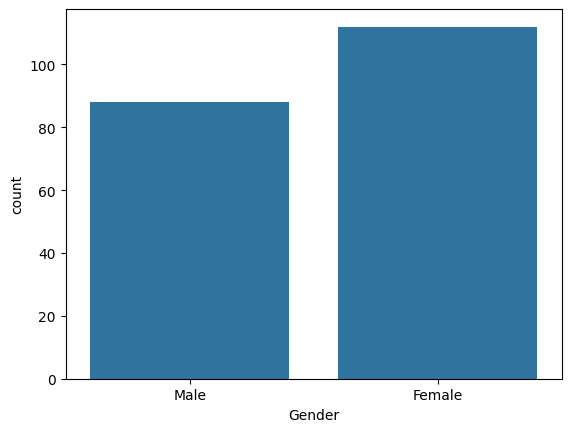

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.countplot(x='Gender',data=mall_df)
plt.show()

🔴 Con el método `describe` de pandas determina el rango de las variables numéricas

In [164]:
mall_df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


🔴 Haz *one-hot encoding* con la variable categórica usando el método `get_dummies`, no olvides el hiperparámetro `drop_first=True`.

In [165]:
mall_df = pd.get_dummies(mall_df,drop_first=True,dtype=int)
mall_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


🔴 Extrae las variables (features) de cada instancia y define la matrix $X$

In [166]:
import numpy as np

X = mall_df.values
X[:5,:]

array([[19, 15, 39,  1],
       [21, 15, 81,  1],
       [20, 16,  6,  0],
       [23, 16, 77,  0],
       [31, 17, 40,  0]])

❗Aquí no hay división train\test

🔴 **Opcional** Aplica reescalamiento a `X`

In [167]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X[:5,:]

array([[0.01923077, 0.        , 0.3877551 , 1.        ],
       [0.05769231, 0.        , 0.81632653, 1.        ],
       [0.03846154, 0.00819672, 0.05102041, 0.        ],
       [0.09615385, 0.00819672, 0.7755102 , 0.        ],
       [0.25      , 0.01639344, 0.39795918, 0.        ]])

🔴 Clusteriza las instancias, usa K-Means y prueba con dos valores de tu elección para el número de clusters

In [168]:
from sklearn.cluster import KMeans

clustering = KMeans(n_clusters=4)
clustering.fit(X)

KMeans(n_clusters=4)

🔴 Extrae los clusters (es decir, el arreglo que dice a qué cluster pertenece cada instancia) con el atributo `labels_`

In [169]:
import numpy as np

clusters = clustering.labels_
print(clusters[:10])

[3 3 2 0 0 0 2 0 1 0]


🔴 Evalua el clustering usando la métrica silueta.

**Recuerda que esta métrica es un número $-1\leq s\leq 1$** y entre más alto es mejor.

In [170]:
from sklearn.metrics import silhouette_score

silhouette_score(X,clusters)

np.float64(0.3641657522339062)

🟢 Visualicemos los resultados. Dado que no son tantos ejemplos, imprimamos un dataframe mostrando cada uno de los clusters.

¿Cómo etiquetarias a cada cluster? Es decir, ¿qué comparten en común cada cluster?

In [171]:
import numpy as np

num_clusters = np.unique(clusters).shape[0]

for i in range(num_clusters):
    print(f"Cluster {i}")
    display(original_mall_df[clusters==i])

Cluster 0


,Gender,Age,Annual Income (k$),Spending Score (1-100)
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
7,Female,23,18,94
9,Female,30,19,72
11,Female,35,19,99
13,Female,24,20,77
19,Female,35,23,98
29,Female,23,29,87
31,Female,21,30,73


Cluster 1


,Gender,Age,Annual Income (k$),Spending Score (1-100)
8,Male,64,19,3
10,Male,67,19,14
14,Male,37,20,13
18,Male,52,23,29
20,Male,35,24,35
30,Male,60,30,4
32,Male,53,33,4
42,Male,48,39,36
53,Male,59,43,60
55,Male,47,43,41


Cluster 2


,Gender,Age,Annual Income (k$),Spending Score (1-100)
2,Female,20,16,6
6,Female,35,18,6
12,Female,58,20,15
16,Female,35,21,35
22,Female,46,25,5
24,Female,54,28,14
26,Female,45,28,32
28,Female,40,29,31
34,Female,49,33,14
36,Female,42,34,17


Cluster 3


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
15,Male,22,20,79
17,Male,20,21,66
21,Male,25,24,73
23,Male,31,25,73
25,Male,29,28,82
27,Male,35,28,61
33,Male,18,33,92
41,Male,24,38,92


Podemos ver que basicamente los 4 grupos son:

* Hombres jovenes que gastan mucho
* Hombres que gastan menos
* Mujeres que gastan más
* Mujeres que gastan menos

🔴 **Extra**: Hacer reducción de dimensionalidad usando PCA a dos dimensiones y graficar todas las instancias coloreadas por cluster

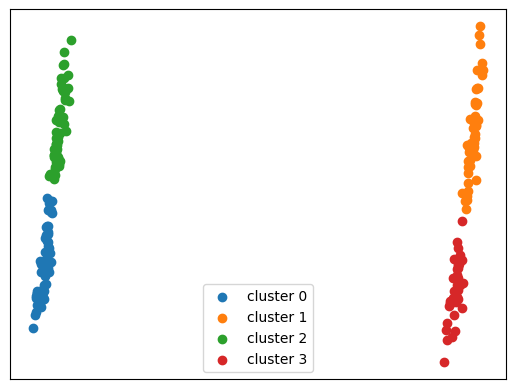

In [174]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure()
for i in range(num_clusters):
    plt.scatter(x=X_pca[clusters==i,0],y=X_pca[clusters==i,1],label=f"cluster {i}")
plt.legend()
plt.xticks([])
plt.yticks([])
plt.show()

Añandimos una columna con el número de cluster y luego agrupamos el dataframe por cada cluster y sacamos el promedio de cada variable. Esto soporta nuestra descripción de los clusters

In [173]:
mall_df['Cluster'] = clusters
mall_df.groupby('Cluster').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
Cluster,,,,
0,28.438596,59.666667,67.684211,0.0
1,49.437500,62.416667,29.208333,1.0
2,48.109091,58.818182,34.781818,0.0
3,28.250000,62.000000,71.675000,1.0
